In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv(
    'Data/GlobalInflation.csv',
    encoding='latin-1'
    )
df.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


In [7]:
columns_to_drop = ['IMF Country Code', 'Series Name','Unnamed: 59','Unnamed: 60','Unnamed: 61','Unnamed: 62','Unnamed: 63']
df = df.drop(columns=columns_to_drop)

In [8]:
df.head()

,Country Code,Country,Indicator Type,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Note
0,ABW,Aruba,Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation
1,AFG,Afghanistan,Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,...,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation
2,AGO,Angola,Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,...,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation
3,ALB,Albania,Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation
4,ARE,United Arab Emirates,Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,...,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation


Check for missing or invalid data

In [9]:
print(df.isnull().sum())

Country Code        0
Country             0
Indicator Type      0
1970              361
1971              355
1972              353
1973              353
1974              349
1975              349
1976              353
1977              356
1978              355
1979              355
1980              350
1981              332
1982              325
1983              319
1984              313
1985              317
1986              308
1987              301
1988              298
1989              300
1990              294
1991              276
1992              264
1993              247
1994              231
1995              224
1996              213
1997              208
1998              199
1999              192
2000              187
2001              173
2002              158
2003              154
2004              149
2005              137
2006              122
2007              112
2008              103
2009               97
2010               90
2011               96
2012      

In [10]:
summary_stats = df.groupby('Country')['2022'].describe()
print(summary_stats)

                     count        mean         std    min      25%     50%  \
Country                                                                      
Afghanistan            0.0         NaN         NaN    NaN      NaN     NaN   
Albania                5.0   11.744000    5.509703   6.12   6.7300  11.420   
Algeria                3.0    8.686667    5.776239   2.38   6.1700   9.960   
Angola                 3.0   24.463333    3.002005  21.35  23.0250  24.700   
Antigua and Barbuda    2.0    8.085000    0.615183   7.65   7.8675   8.085   
...                    ...         ...         ...    ...      ...     ...   
Vietnam                4.0    2.490000    0.497125   1.96   2.2825   2.420   
West Bank and Gaza     0.0         NaN         NaN    NaN      NaN     NaN   
Yemen, Rep.            1.0   43.850000         NaN  43.85  43.8500  43.850   
Zambia                 3.0   13.160000    2.364508  10.99  11.9000  12.810   
Zimbabwe               3.0  132.440000  132.260659  49.07  56.19

In [11]:
brics_countries = ['Brazil','Russian Federation', 'India', 'China', 'South Africa']
BRICS = df[df['Country'].isin(brics_countries)]

In [12]:
BRICSdf=BRICS[['Country Code'] + [str(year) for year in range(2010, 2023)]].head(5)
BRICSdf

,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
23,BRA,5.04,6.64,5.40,6.20,6.33,9.03,8.74,3.45,3.66,3.73,3.21,8.30,9.30
33,CHN,3.18,5.55,2.62,2.62,1.92,1.44,2.00,1.56,2.07,2.90,2.42,0.90,1.97
79,IND,11.99,8.86,9.31,10.91,6.35,5.87,4.94,3.60,4.86,4.76,6.62,4.89,6.69
148,RUS,6.85,8.44,5.07,6.75,7.82,15.53,7.04,3.68,2.88,4.47,3.38,6.69,13.75
190,ZAF,4.06,5.02,5.72,5.78,6.14,4.51,6.59,5.27,4.50,4.13,3.22,4.61,7.00


In [13]:
# Assuming df is your DataFrame
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
G7 = df[df['Country'].isin(g7_countries)]

In [14]:
G7df=G7[['Country Code']+['Indicator Type']+[str(year) for year in range(2010,2023)]].head(7)
G7df

,Country Code,Indicator Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
30,CAN,Inflation,1.78,2.91,1.52,0.94,1.91,1.13,1.43,1.60,2.27,1.95,0.72,3.40,6.8
45,DEU,Inflation,1.10,2.08,2.01,1.50,0.91,0.51,0.49,1.71,1.73,1.35,0.51,3.14,7.9
59,FRA,Inflation,1.53,2.11,1.95,0.86,0.51,0.04,0.18,1.16,1.85,1.30,0.48,1.64,5.2
62,GBR,Inflation,2.50,3.88,2.56,2.29,1.43,0.40,1.00,2.68,2.32,1.79,0.99,2.50,7.9
85,ITA,Inflation,1.53,2.78,3.04,1.22,0.24,0.04,-0.09,1.33,1.14,0.63,-0.14,1.87,8.2
88,JPN,Inflation,-0.72,-0.27,-0.05,0.35,2.76,0.79,-0.12,0.47,0.98,0.48,-0.02,-0.23,2.5
182,USA,Inflation,1.64,3.16,2.07,1.46,1.62,0.12,1.26,2.14,2.44,1.81,1.23,4.70,8.0


In [27]:
G7stat=G7df.describe()
G7stat

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.337143,2.378571,1.871429,1.231429,1.340000,0.432857,0.592857,1.584286,1.818571,1.330000,0.538571,2.431429,6.642857
std,1.000212,1.321911,0.976378,0.611676,0.867141,0.413752,0.641241,0.708493,0.579351,0.583124,0.498579,1.560774,2.109389
min,-0.720000,-0.270000,-0.050000,0.350000,0.240000,0.040000,-0.120000,0.470000,0.980000,0.480000,-0.140000,-0.230000,2.500000
25%,1.315000,2.095000,1.735000,0.900000,0.710000,0.080000,0.045000,1.245000,1.435000,0.965000,0.230000,1.755000,6.000000
50%,1.530000,2.780000,2.010000,1.220000,1.430000,0.400000,0.490000,1.600000,1.850000,1.350000,0.510000,2.500000,7.900000
75%,1.710000,3.035000,2.315000,1.480000,1.765000,0.650000,1.130000,1.925000,2.295000,1.800000,0.855000,3.270000,7.950000
max,2.500000,3.880000,3.040000,2.290000,2.760000,1.130000,1.430000,2.680000,2.440000,1.950000,1.230000,4.700000,8.200000


In [41]:
BRICSstat=BRICSdf.describe()
BRICSstat

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,6.224000,6.902000,5.624000,6.452000,5.712000,7.276000,5.862000,3.512000,3.594000,3.998000,3.770000,5.078000,7.74200
std,3.499619,1.705702,2.396712,2.964873,2.224583,5.359373,2.547827,1.317259,1.146769,0.724272,1.636551,2.769922,4.28651
min,3.180000,5.020000,2.620000,2.620000,1.920000,1.440000,2.000000,1.560000,2.070000,2.900000,2.420000,0.900000,1.97000
25%,4.060000,5.550000,5.070000,5.780000,6.140000,4.510000,4.940000,3.450000,2.880000,3.730000,3.210000,4.610000,6.69000
50%,5.040000,6.640000,5.400000,6.200000,6.330000,5.870000,6.590000,3.600000,3.660000,4.130000,3.220000,4.890000,7.00000
75%,6.850000,8.440000,5.720000,6.750000,6.350000,9.030000,7.040000,3.680000,4.500000,4.470000,3.380000,6.690000,9.30000
max,11.990000,8.860000,9.310000,10.910000,7.820000,15.530000,8.740000,5.270000,4.860000,4.760000,6.620000,8.300000,13.75000


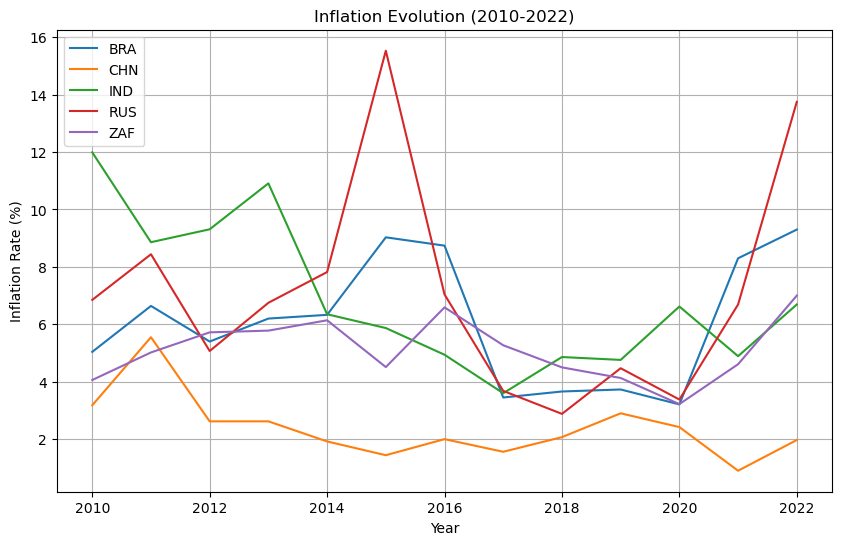

In [43]:
import matplotlib.pyplot as plt

# Data
countries = ['BRA', 'CHN', 'IND', 'RUS', 'ZAF']
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

inflation_rates = {
    'BRA': [5.04, 6.64, 5.40, 6.20, 6.33, 9.03, 8.74, 3.45, 3.66, 3.73, 3.21, 8.30, 9.30],
    'CHN': [3.18, 5.55, 2.62, 2.62, 1.92, 1.44, 2.00, 1.56, 2.07, 2.90, 2.42, 0.90, 1.97],
    'IND': [11.99, 8.86, 9.31, 10.91, 6.35, 5.87, 4.94, 3.60, 4.86, 4.76, 6.62, 4.89, 6.69],
    'RUS': [6.85, 8.44, 5.07, 6.75, 7.82, 15.53, 7.04, 3.68, 2.88, 4.47, 3.38, 6.69, 13.75],
    'ZAF': [4.06, 5.02, 5.72, 5.78, 6.14, 4.51, 6.59, 5.27, 4.50, 4.13, 3.22, 4.61, 7.00]
}

# Create a plot
plt.figure(figsize=(10, 6))

for country in countries:
    plt.plot(years, inflation_rates[country], label=country)

plt.title('Inflation Evolution (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


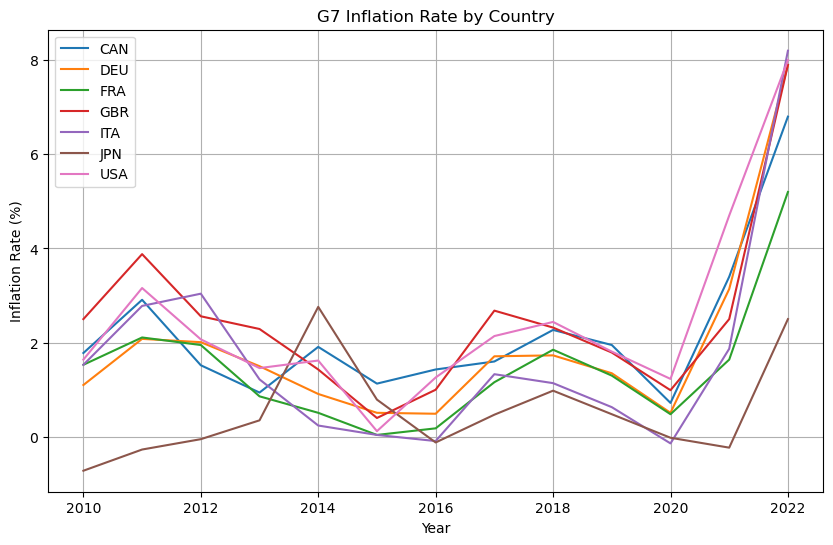

In [32]:
# Data
countries = ['CAN', 'DEU', 'FRA', 'GBR', 'ITA', 'JPN', 'USA']
years = list(range(2010, 2023))

# Inflation data for each country
inflation_data = [
    [1.78, 2.91, 1.52, 0.94, 1.91, 1.13, 1.43, 1.60, 2.27, 1.95, 0.72, 3.40, 6.8],
    [1.10, 2.08, 2.01, 1.50, 0.91, 0.51, 0.49, 1.71, 1.73, 1.35, 0.51, 3.14, 7.9],
    [1.53, 2.11, 1.95, 0.86, 0.51, 0.04, 0.18, 1.16, 1.85, 1.30, 0.48, 1.64, 5.2],
    [2.50, 3.88, 2.56, 2.29, 1.43, 0.40, 1.00, 2.68, 2.32, 1.79, 0.99, 2.50, 7.9],
    [1.53, 2.78, 3.04, 1.22, 0.24, 0.04, -0.09, 1.33, 1.14, 0.63, -0.14, 1.87, 8.2],
    [-0.72, -0.27, -0.05, 0.35, 2.76, 0.79, -0.12, 0.47, 0.98, 0.48, -0.02, -0.23, 2.5],
    [1.64, 3.16, 2.07, 1.46, 1.62, 0.12, 1.26, 2.14, 2.44, 1.81, 1.23, 4.70, 8.0]
]

# Plotting
plt.figure(figsize=(10, 6))

for i in range(len(countries)):
    plt.plot(years, inflation_data[i], label=countries[i])

plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('G7 Inflation Rate by Country')
plt.legend()
plt.grid(True)

plt.show()


### Interpretaion 
- the BRICS countries (especially Brazil, Russia, and India) experienced higher inflation rates with more fluctuations compared to the G7 countries. The G7 countries demonstrated more stable and mature economic environments with lower and consistent inflation rates. The impact of the COVID-19 pandemic on inflation rates was evident in both groups, but BRICS countries experienced more pronounced fluctuations in certain cases.

- the spike in Russian inflation between 2014 and 2016 was a result of a combination of external and internal factors, including geopolitical tensions, economic sanctions, sharp currency depreciation, and high inflation expectations.

- The inflationary environments in Japan and China are shaped by a combination of unique economic structures, policies, and demographic trends. In Japan, the persistent deflationary pressures stem from a rapidly aging population. With a significant portion of citizens being elderly, consumer spending tends to be lower, leading to reduced demand for goods and services. Additionally, the Bank of Japan's aggressive monetary policies, including ultra-low interest rates and quantitative easing, have been implemented to combat deflation. In contrast, China's controlled economic growth plays a pivotal role in maintaining stable prices. The Chinese government employs a range of policies to manage inflation, setting specific targets and implementing supply-side measures to control production costs. Moreover, state control over key sectors, such as energy and finance, enables direct intervention in prices and production.

#### Autoregressive Integrated Moving Average (ARIMA) model

In [19]:
from statsmodels.tsa.arima.model import ARIMA

ts = BRICSdf.set_index('2022')['Country Code']

# Fit an ARIMA model
model = ARIMA(ts, order=(1, 2, 3)) 
results = model.fit()

# Forecast future values
future_steps = 5  # Set the number of steps to forecast
forecast = results.get_forecast(steps=future_steps)

# Get the forecasted values and their confidence intervals
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Print the forecasted values and confidence intervals
print(forecast_values)
print(confidence_interval)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).